In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image  # To display images in jupyter notebook
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

In [2]:
df = pd.read_excel(io='Merged_data_frame.xlsx', sheet_name=0)

In [3]:
# df['STORE_NBR'].unique()

In [4]:
df.drop('Unnamed: 0', inplace=True, axis=1)
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WEIGHT(g),LIFESTAGE,PREMIUM_CUSTOMER,MONTH
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,YOUNG SINGLES/COUPLES,Premium,10
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,MIDAGE SINGLES/COUPLES,Budget,5
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,2,3.8,160,MIDAGE SINGLES/COUPLES,Budget,11
3,2019-03-09,1,1307,347,54,CCs Original,1,2.1,175,MIDAGE SINGLES/COUPLES,Budget,3
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,MIDAGE SINGLES/COUPLES,Budget,5


In [5]:
# Make Month as new column, by seperating months form date

months = [str(date).split('-')[1] for date in df['DATE']]
df['MONTH'] = months

In [6]:
# Save to excel file
df.to_excel(excel_writer='Merged_data_frame.xlsx', sheet_name='Sheet1')

# Part-1

# Find Control Stores

In [7]:
import datetime

jul_first_date = '2018-7-1'
jan_last_date =  '2019-1-31'

# Select Stores from 2018-7-1 to 2019-1-31

filter_mask = ((df['DATE'] >= jul_first_date) & (df['DATE'] <= jan_last_date))

pre_trial_df = df[filter_mask]
pre_trial_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WEIGHT(g),LIFESTAGE,PREMIUM_CUSTOMER,MONTH
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,YOUNG SINGLES/COUPLES,Premium,10
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,2,3.8,160,MIDAGE SINGLES/COUPLES,Budget,11
5,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,5,15.0,175,MIDAGE SINGLES/COUPLES,Budget,08
6,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili,3,13.8,150,MIDAGE SINGLES/COUPLES,Budget,08
8,2018-08-06,4,4074,2978,70,Tyrrells Crisps Lightly Salted,2,8.4,165,MIDAGE SINGLES/COUPLES,Budget,08


In [8]:
# Get Stores 88, 77, 86 under pre trial period.
msk1 = ((pre_trial_df['STORE_NBR'] == 77) | (pre_trial_df['STORE_NBR'] == 86) | (pre_trial_df['STORE_NBR'] == 88))
df1 = pre_trial_df[msk1]

# Get Stores other than 88, 77, 86 under pre trial period.
msk2 = ~((pre_trial_df['STORE_NBR'] == 77) | (pre_trial_df['STORE_NBR'] == 86) | (pre_trial_df['STORE_NBR'] == 88))
df2 = pre_trial_df[msk2]

In [9]:
df1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WEIGHT(g),LIFESTAGE,PREMIUM_CUSTOMER,MONTH
295,2018-07-07,88,88320,87804,47,Doritos Corn Chips Original,2,8.8,170,MIDAGE SINGLES/COUPLES,Budget,07
296,2018-07-16,88,88320,87805,9,Kettle Tortilla ChpsBtroot&Ricotta,2,9.2,150,MIDAGE SINGLES/COUPLES,Budget,07
297,2018-09-17,88,88320,87806,65,Old El Paso Salsa Dip Chnky Tom Ht,2,10.2,300,MIDAGE SINGLES/COUPLES,Budget,09
298,2018-09-29,88,88320,87807,74,Tostitos Splash Of Lime,2,8.8,175,MIDAGE SINGLES/COUPLES,Budget,09
299,2018-10-29,88,88320,87808,90,Tostitos Smoked Chipotle,2,8.8,175,MIDAGE SINGLES/COUPLES,Budget,10


In [10]:
# Data of Store 77

sales_sum_store_77 = df1[df1['STORE_NBR'] == 77]['TOT_SALES'].sum()
total_customer_count_store_77 = len(df1[df1['STORE_NBR'] == 77]['LYLTY_CARD_NBR'].unique())
total_transaction_count_store_77 = len(df1[df1['STORE_NBR'] == 77]['TXN_ID'].unique())

In [11]:
# Data of Store 86

sales_sum_store_86 = df1[df1['STORE_NBR'] == 86]['TOT_SALES'].sum()
total_customer_count_store_86 = len(df1[df1['STORE_NBR'] == 86]['LYLTY_CARD_NBR'].unique())
total_transaction_count_store_86 = len(df1[df1['STORE_NBR'] == 86]['TXN_ID'].unique())

In [12]:
# Data of Store 88

sales_sum_store_88 = df1[df1['STORE_NBR'] == 88]['TOT_SALES'].sum()
total_customer_count_store_88 = len(df1[df1['STORE_NBR'] == 88]['LYLTY_CARD_NBR'].unique())
total_transaction_count_store_88 = len(df1[df1['STORE_NBR'] == 88]['TXN_ID'].unique())

In [13]:
# Store ID's that has Closest total revenue for store id's 77, 86, 88 respectively

def closest(lst, K): # Find closest value to value k in the lst.
        return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]

dict_sum_sales_store_77 = {}
dict_sum_sales_store_86 = {}
dict_sum_sales_store_88 = {}

for st in [sales_sum_store_77, sales_sum_store_86, sales_sum_store_88]:
    all_stores = list(df2['STORE_NBR'].unique())

    rank = 1

    for store in all_stores:
        if rank <= 20:
            temp_list = list()

            for store_id in all_stores:
                msk = (df2['STORE_NBR'] == store_id)
                temp_df = df2[msk]
                t_sum = temp_df['TOT_SALES'].sum()

                temp_list.append([store_id, t_sum])

            value = closest(np.array(temp_list)[:, 1:], st)[0]

            for s, summ in temp_list:
                if summ == value:
                    if st == sales_sum_store_77:
                        dict_sum_sales_store_77[s] = rank
                    elif st == sales_sum_store_86:
                        dict_sum_sales_store_86[s] = rank
                    elif st == sales_sum_store_88:
                        dict_sum_sales_store_88[s] = rank
                    all_stores.remove(s)
                    rank += 1    

In [14]:
# Store ID's that has Closest Total Customer Count for store id's 77, 86, 88 respectively.

def closest(lst, K): # Find closest value to value k in the lst.
        return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]

dict_customer_count_77 = {}
dict_customer_count_86 = {}
dict_customer_count_88 = {}

for st in [total_customer_count_store_77, total_customer_count_store_86, total_customer_count_store_88]:
    all_stores = list(df2['STORE_NBR'].unique())

    rank = 1

    for store in all_stores:
        if rank <= 20:
            temp_list = list()

            for store_id in all_stores:
                msk = (df2['STORE_NBR'] == store_id)
                temp_df = df2[msk]
                t_sum = len(temp_df['LYLTY_CARD_NBR'].unique())

                temp_list.append([store_id, t_sum])

            value = closest(np.array(temp_list)[:, 1:], st)[0]

            for s, summ in temp_list:
                if summ == value:
                    if st == total_customer_count_store_77:
                        dict_customer_count_77[s] = rank
                    elif st == total_customer_count_store_86:
                        dict_customer_count_86[s] = rank
                    elif st == total_customer_count_store_88:
                        dict_customer_count_88[s] = rank
                    all_stores.remove(s)
                    rank += 1   

In [15]:
# Store ID's that has Closest Total Transaction Count for store id's 77, 86, 88 respectively.

def closest(lst, K): # Find closest value to value k in the lst.
        return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]

dict_transaction_count_77 = {}
dict_transaction_count_86 = {}
dict_transaction_count_88 = {}

for st in [total_transaction_count_store_77, total_transaction_count_store_86, total_transaction_count_store_88]:

    all_stores = list(df2['STORE_NBR'].unique())

    rank = 1

    for store in all_stores:
        if rank <= 20:
            temp_list = list()

            for store_id in all_stores:
                msk = (df2['STORE_NBR'] == store_id)
                temp_df = df2[msk]
                t_sum = len(temp_df['TXN_ID'].unique())

                temp_list.append([store_id, t_sum])

            value = closest(np.array(temp_list)[:, 1:], st)[0]

            for s, summ in temp_list:
                if summ == value:
                    if st == total_transaction_count_store_77:
                        dict_transaction_count_77[s] = rank
                    elif st == total_transaction_count_store_86:
                        dict_transaction_count_86[s] = rank
                    elif st == total_transaction_count_store_88:
                        dict_transaction_count_88[s] = rank
                    all_stores.remove(s)
                    rank += 1  

In [16]:
d11 =  pd.DataFrame(data = list(zip(dict_sum_sales_store_77.values(), dict_sum_sales_store_77.keys())), columns=['Rank', 'Store'])
d12 = pd.DataFrame(data = list(zip(dict_customer_count_77.values(), dict_customer_count_77.keys())), columns=['Rank', 'Store'])
d13 = pd.DataFrame(data = list(zip(dict_transaction_count_77.values(), dict_transaction_count_77.keys())), columns=['Rank', 'Store'])

merged_df = pd.merge(left=d11, right=d12, how='inner', on='Store')
merged_df = pd.merge(left=merged_df, right=d13, how='inner', on='Store')
merged_df['Rank Sum'] = merged_df['Rank_x'] + merged_df['Rank_y'] + merged_df['Rank']
merged_df.rename(columns={'Rank_x': 'Total sales Rank', 'Rank_y': 'Customer Count Rank', 'Rank': 'Transaction Count Rank'}, inplace=True)
merged_df.sort_values('Rank Sum')

,Total sales Rank,Store,Customer Count Rank,Transaction Count Rank,Rank Sum
1,7,6,12,9,28
0,4,233,16,18,38


In [17]:
d11 =  pd.DataFrame(data = list(zip(dict_sum_sales_store_86.values(), dict_sum_sales_store_86.keys())), columns=['Rank', 'Store'])
d12 = pd.DataFrame(data = list(zip(dict_customer_count_86.values(), dict_customer_count_86.keys())), columns=['Rank', 'Store'])
d13 = pd.DataFrame(data = list(zip(dict_transaction_count_86.values(), dict_transaction_count_86.keys())), columns=['Rank', 'Store'])

merged_df = pd.merge(left=d11, right=d12, how='inner', on='Store')
merged_df = pd.merge(left=merged_df, right=d13, how='inner', on='Store')
merged_df['Rank Sum'] = merged_df['Rank_x'] + merged_df['Rank_y'] + merged_df['Rank']
merged_df.rename(columns={'Rank_x': 'Total sales Rank', 'Rank_y': 'Customer Count Rank', 'Rank': 'Transaction Count Rank'}, inplace=True)
merged_df.sort_values('Rank Sum')

,Total sales Rank,Store,Customer Count Rank,Transaction Count Rank,Rank Sum
0,6,57,3,3,12
1,8,207,12,9,29
2,14,122,22,15,51


In [18]:
d11 =  pd.DataFrame(data = list(zip(dict_sum_sales_store_88.values(), dict_sum_sales_store_88.keys())), columns=['Rank', 'Store'])
d12 = pd.DataFrame(data = list(zip(dict_customer_count_88.values(), dict_customer_count_88.keys())), columns=['Rank', 'Store'])
d13 = pd.DataFrame(data = list(zip(dict_transaction_count_88.values(), dict_transaction_count_88.keys())), columns=['Rank', 'Store'])

merged_df = pd.merge(left=d11, right=d12, how='inner', on='Store')
merged_df = pd.merge(left=merged_df, right=d13, how='inner', on='Store')
merged_df['Rank Sum'] = merged_df['Rank_x'] + merged_df['Rank_y'] + merged_df['Rank']
merged_df.rename(columns={'Rank_x': 'Total sales Rank', 'Rank_y': 'Customer Count Rank', 'Rank': 'Transaction Count Rank'}, inplace=True)
merged_df.sort_values('Rank Sum')

,Total sales Rank,Store,Customer Count Rank,Transaction Count Rank,Rank Sum
2,3,58,2,4,9
0,1,237,8,1,10
1,2,165,5,5,12
4,5,203,3,10,18
5,6,40,4,12,22
3,4,4,14,6,24
7,8,226,7,20,35
6,7,199,16,18,41


[Text(0, 0.5, 'Total Transaction Count'),
 Text(0.5, 0, 'Store ID'),
 Text(0.5, 1.0, 'Jul-2018 to Jan-2019')]

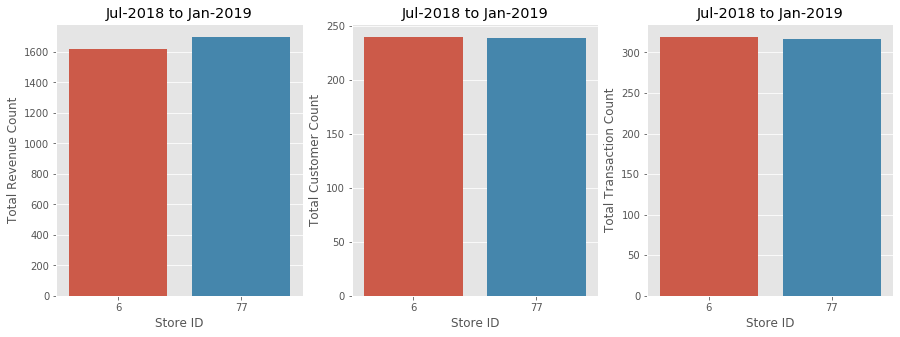

In [19]:
# <<<--- Plot the Data for Store 77 and 6 --->>>

fig1, ax1 =plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.barplot(x=['77', '6'], y=[sales_sum_store_77, df2[df2['STORE_NBR']==6]['TOT_SALES'].sum()], ax=ax1[0])  # Barplot
ax1[0].set(xlabel="Store ID", ylabel='Total Revenue Count', title='Jul-2018 to Jan-2019')      

sns.barplot(x=['77', '6'], y=[total_customer_count_store_77,  len(df2[df2['STORE_NBR']==6]['LYLTY_CARD_NBR'].unique())], ax=ax1[1])  # Barplot
ax1[1].set(xlabel="Store ID", ylabel='Total Customer Count', title='Jul-2018 to Jan-2019')

sns.barplot(x=['77', '6'], y=[total_transaction_count_store_77, len(df2[df2['STORE_NBR']==6]['TXN_ID'].unique())], ax=ax1[2])  # Barplot
ax1[2].set(xlabel="Store ID", ylabel='Total Transaction Count', title='Jul-2018 to Jan-2019')

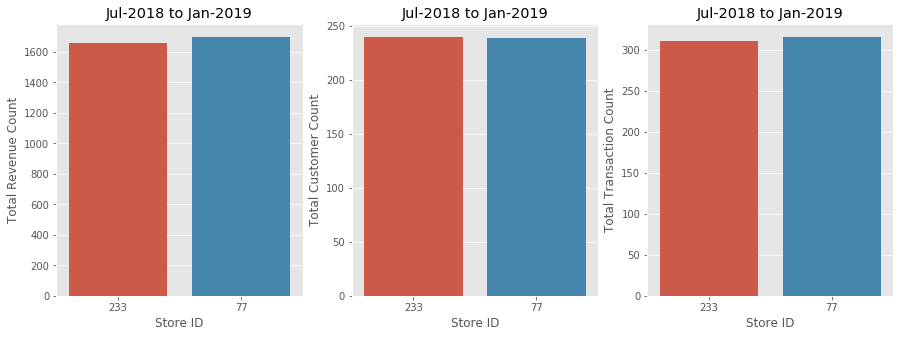

In [20]:
# <<<--- Plot the Data for Store 77 and 233 --->>>

fig1, ax1 =plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.barplot(x=['77', '233'], y=[sales_sum_store_77, df2[df2['STORE_NBR']==233]['TOT_SALES'].sum()], ax=ax1[0])  # Barplot
ax1[0].set(xlabel="Store ID", ylabel='Total Revenue Count', title='Jul-2018 to Jan-2019')      

sns.barplot(x=['77', '233'], y=[total_customer_count_store_77,  len(df2[df2['STORE_NBR']==233]['LYLTY_CARD_NBR'].unique())], ax=ax1[1])  # Barplot
ax1[1].set(xlabel="Store ID", ylabel='Total Customer Count', title='Jul-2018 to Jan-2019')

sns.barplot(x=['77', '233'], y=[total_transaction_count_store_77, len(df2[df2['STORE_NBR']==233]['TXN_ID'].unique())], ax=ax1[2])  # Barplot
ax1[2].set(xlabel="Store ID", ylabel='Total Transaction Count', title='Jul-2018 to Jan-2019')

fig1.savefig('Task21.png')

C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


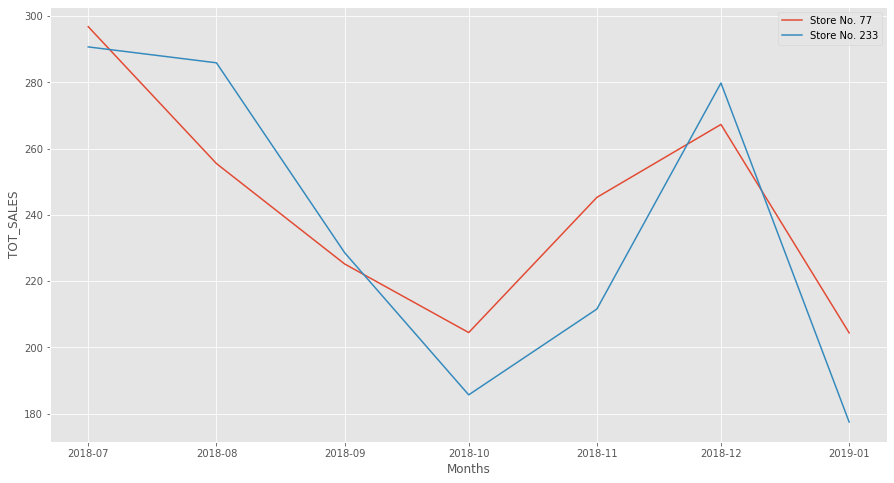

In [21]:
import datetime

plt.figure(figsize=(15,8))

t_d1 = pre_trial_df[pre_trial_df['STORE_NBR'] == 77].groupby(by='MONTH').sum()
t_d1['Months'] = ['2019-1', '2018-7', '2018-8', '2018-9', '2018-10', '2018-11', '2018-12']
t_d1['Months'] = [datetime.datetime.strptime(date, '%Y-%m') for date in t_d1['Months']]

t_d2 = pre_trial_df[pre_trial_df['STORE_NBR'] == 233].groupby(by='MONTH').sum()
t_d2['Months'] = ['2019-1', '2018-7', '2018-8', '2018-9', '2018-10', '2018-11', '2018-12']
t_d2['Months'] = [datetime.datetime.strptime(date, '%Y-%m') for date in t_d2['Months']]

sns.lineplot(x=t_d1['Months'], y=t_d1['TOT_SALES'], legend='brief')
sns.lineplot(x=t_d2['Months'], y=t_d2['TOT_SALES'], legend='brief')

plt.legend(['Store No. 77', 'Store No. 233'])

plt.savefig('Task22.png')

## Results:
### We got 2 stores (ie. store 6 and 233) as control store for 77. Both 6 and 233 are quite similar, but 233 is very slightly more similar to Store Id 77.
### Therefore we select 233 as control store for Store id 77.

[Text(0, 0.5, 'Total Transaction Count'),
 Text(0.5, 0, 'Store ID'),
 Text(0.5, 1.0, 'Jul-2018 to Jan-2019')]

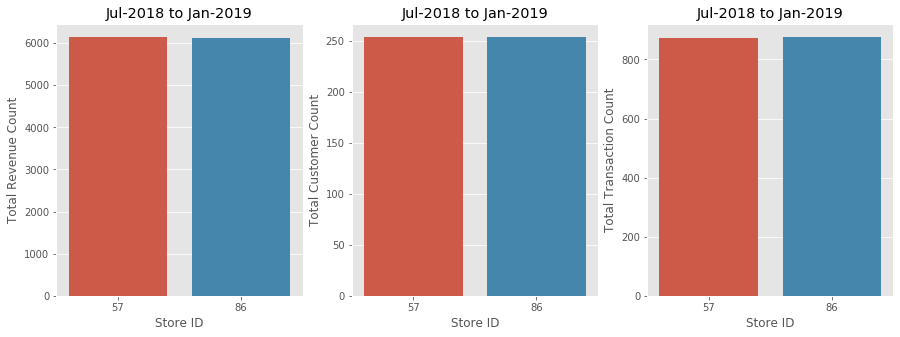

In [22]:
# <<<--- Plot the Data for Store 86 and 57 --->>>

fig1, ax1 =plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.barplot(x=['86', '57'], y=[sales_sum_store_86, df2[df2['STORE_NBR']==57]['TOT_SALES'].sum()], ax=ax1[0])  # Barplot
ax1[0].set(xlabel="Store ID", ylabel='Total Revenue Count', title='Jul-2018 to Jan-2019')      

sns.barplot(x=['86', '57'], y=[total_customer_count_store_86,  len(df2[df2['STORE_NBR']==57]['LYLTY_CARD_NBR'].unique())], ax=ax1[1])  # Barplot
ax1[1].set(xlabel="Store ID", ylabel='Total Customer Count', title='Jul-2018 to Jan-2019')

sns.barplot(x=['86', '57'], y=[total_transaction_count_store_86, len(df2[df2['STORE_NBR']==57]['TXN_ID'].unique())], ax=ax1[2])  # Barplot
ax1[2].set(xlabel="Store ID", ylabel='Total Transaction Count', title='Jul-2018 to Jan-2019')

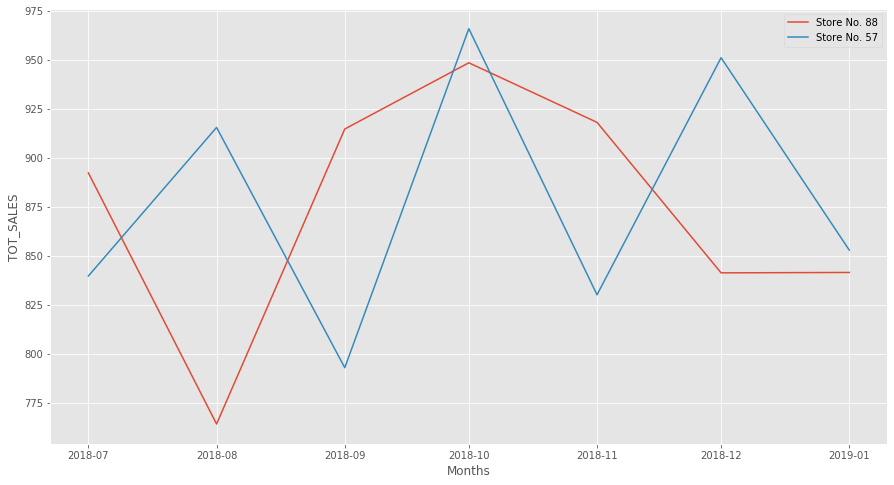

In [23]:
import datetime

plt.figure(figsize=(15,8))

t_d1 = pre_trial_df[pre_trial_df['STORE_NBR'] == 86].groupby(by='MONTH').sum()
t_d1['Months'] = ['2019-1', '2018-7', '2018-8', '2018-9', '2018-10', '2018-11', '2018-12']
t_d1['Months'] = [datetime.datetime.strptime(date, '%Y-%m') for date in t_d1['Months']]

t_d2 = pre_trial_df[pre_trial_df['STORE_NBR'] == 57].groupby(by='MONTH').sum()
t_d2['Months'] = ['2019-1', '2018-7', '2018-8', '2018-9', '2018-10', '2018-11', '2018-12']
t_d2['Months'] = [datetime.datetime.strptime(date, '%Y-%m') for date in t_d2['Months']]

sns.lineplot(x=t_d1['Months'], y=t_d1['TOT_SALES'], legend='brief')
sns.lineplot(x=t_d2['Months'], y=t_d2['TOT_SALES'], legend='brief')

plt.legend(['Store No. 88', 'Store No. 57'])

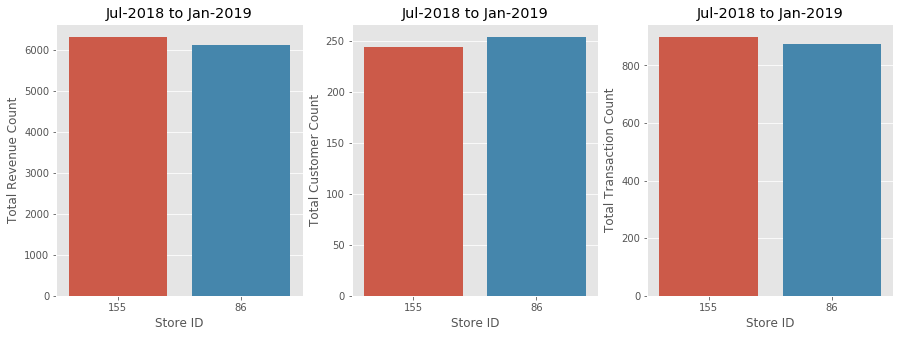

In [24]:
# <<<--- Plot the Data for Store 86 and 155 --->>>

fig1, ax1 =plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.barplot(x=['86', '155'], y=[sales_sum_store_86, df2[df2['STORE_NBR']==155]['TOT_SALES'].sum()], ax=ax1[0])  # Barplot
ax1[0].set(xlabel="Store ID", ylabel='Total Revenue Count', title='Jul-2018 to Jan-2019')      

sns.barplot(x=['86', '155'], y=[total_customer_count_store_86,  len(df2[df2['STORE_NBR']==155]['LYLTY_CARD_NBR'].unique())], ax=ax1[1])  # Barplot
ax1[1].set(xlabel="Store ID", ylabel='Total Customer Count', title='Jul-2018 to Jan-2019')

sns.barplot(x=['86', '155'], y=[total_transaction_count_store_86, len(df2[df2['STORE_NBR']==155]['TXN_ID'].unique())], ax=ax1[2])  # Barplot
ax1[2].set(xlabel="Store ID", ylabel='Total Transaction Count', title='Jul-2018 to Jan-2019')

fig1.savefig('Task23.png')

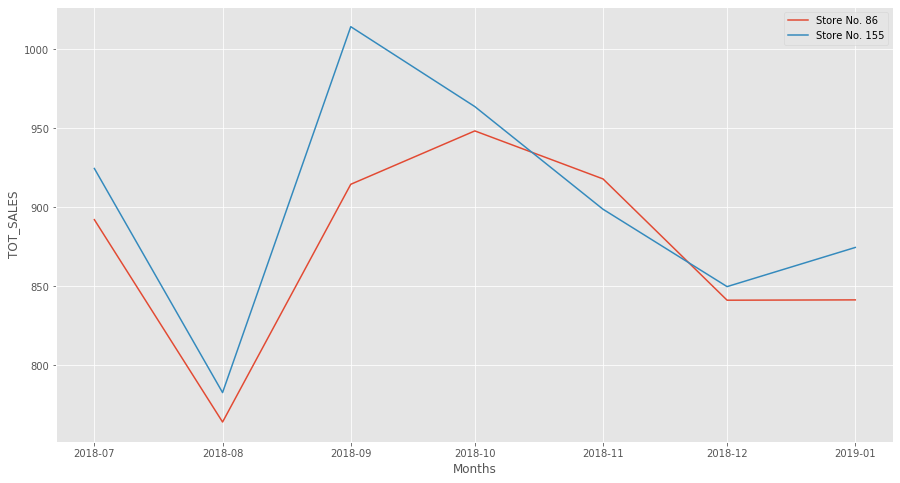

In [25]:
import datetime

plt.figure(figsize=(15,8))

t_d1 = pre_trial_df[pre_trial_df['STORE_NBR'] == 86].groupby(by='MONTH').sum()
t_d1['Months'] = ['2019-1', '2018-7', '2018-8', '2018-9', '2018-10', '2018-11', '2018-12']
t_d1['Months'] = [datetime.datetime.strptime(date, '%Y-%m') for date in t_d1['Months']]

t_d2 = pre_trial_df[pre_trial_df['STORE_NBR'] == 155].groupby(by='MONTH').sum()
t_d2['Months'] = ['2019-1', '2018-7', '2018-8', '2018-9', '2018-10', '2018-11', '2018-12']
t_d2['Months'] = [datetime.datetime.strptime(date, '%Y-%m') for date in t_d2['Months']]

sns.lineplot(x=t_d1['Months'], y=t_d1['TOT_SALES'], legend='brief')
sns.lineplot(x=t_d2['Months'], y=t_d2['TOT_SALES'], legend='brief')

plt.legend(['Store No. 86', 'Store No. 155'])

plt.savefig('Task24.png')

## Results:
### We got 155 as control store for Store id 86.

[Text(0, 0.5, 'Total Transaction Count'),
 Text(0.5, 0, 'Store ID'),
 Text(0.5, 1.0, 'Jul-2018 to Jan-2019')]

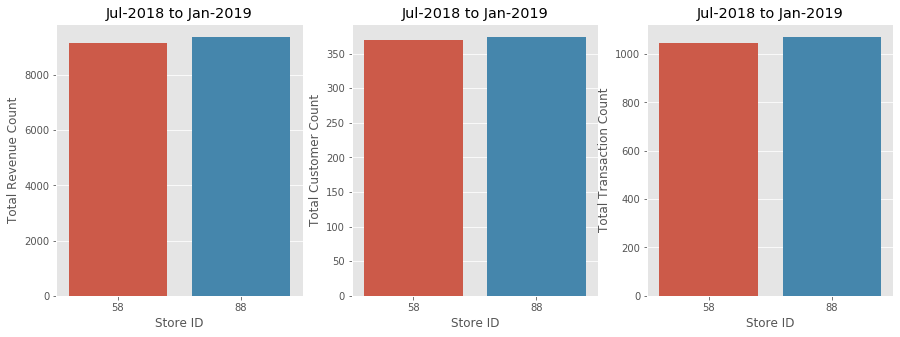

In [26]:
# <<<--- Plot the Data for Store 88 and 58 --->>>

fig1, ax1 =plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.barplot(x=['88', '58'], y=[sales_sum_store_88, df2[df2['STORE_NBR']==58]['TOT_SALES'].sum()], ax=ax1[0])  # Barplot
ax1[0].set(xlabel="Store ID", ylabel='Total Revenue Count', title='Jul-2018 to Jan-2019')      

sns.barplot(x=['88', '58'], y=[total_customer_count_store_88,  len(df2[df2['STORE_NBR']==58]['LYLTY_CARD_NBR'].unique())], ax=ax1[1])  # Barplot
ax1[1].set(xlabel="Store ID", ylabel='Total Customer Count', title='Jul-2018 to Jan-2019')

sns.barplot(x=['88', '58'], y=[total_transaction_count_store_88, len(df2[df2['STORE_NBR']==58]['TXN_ID'].unique())], ax=ax1[2])  # Barplot
ax1[2].set(xlabel="Store ID", ylabel='Total Transaction Count', title='Jul-2018 to Jan-2019')

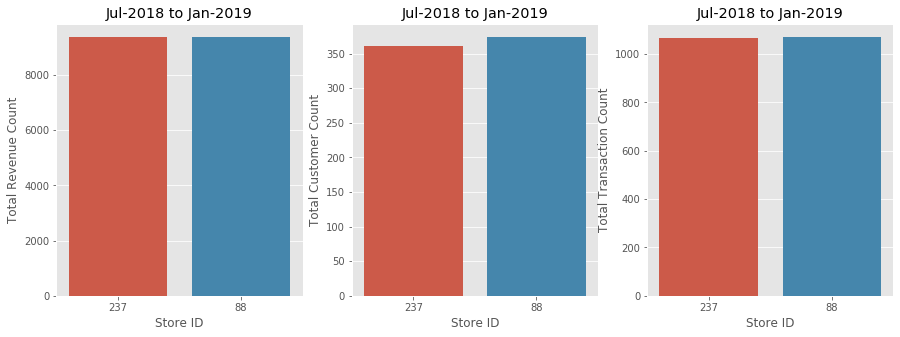

In [27]:
# <<<--- Plot the Data for Store 88 and 237 --->>>

fig1, ax1 =plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.barplot(x=['88', '237'], y=[sales_sum_store_88, df2[df2['STORE_NBR']==237]['TOT_SALES'].sum()], ax=ax1[0])  # Barplot
ax1[0].set(xlabel="Store ID", ylabel='Total Revenue Count', title='Jul-2018 to Jan-2019')      

sns.barplot(x=['88', '237'], y=[total_customer_count_store_88,  len(df2[df2['STORE_NBR']==237]['LYLTY_CARD_NBR'].unique())], ax=ax1[1])  # Barplot
ax1[1].set(xlabel="Store ID", ylabel='Total Customer Count', title='Jul-2018 to Jan-2019')

sns.barplot(x=['88', '237'], y=[total_transaction_count_store_88, len(df2[df2['STORE_NBR']==237]['TXN_ID'].unique())], ax=ax1[2])  # Barplot
ax1[2].set(xlabel="Store ID", ylabel='Total Transaction Count', title='Jul-2018 to Jan-2019')

fig1.savefig('Task25.png')

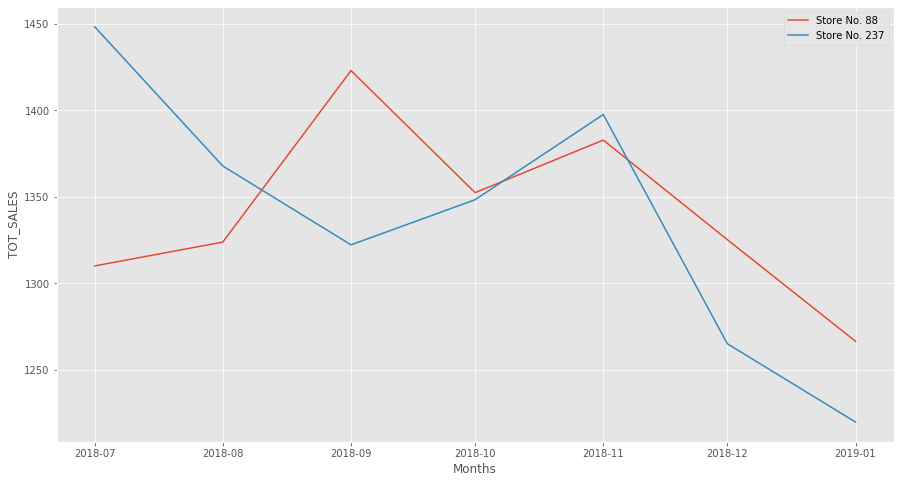

In [28]:
import datetime

plt.figure(figsize=(15,8))

t_d1 = pre_trial_df[pre_trial_df['STORE_NBR'] == 88].groupby(by='MONTH').sum()
t_d1['Months'] = ['2019-1', '2018-7', '2018-8', '2018-9', '2018-10', '2018-11', '2018-12']
t_d1['Months'] = [datetime.datetime.strptime(date, '%Y-%m') for date in t_d1['Months']]

t_d2 = pre_trial_df[pre_trial_df['STORE_NBR'] == 237].groupby(by='MONTH').sum()
t_d2['Months'] = ['2019-1', '2018-7', '2018-8', '2018-9', '2018-10', '2018-11', '2018-12']
t_d2['Months'] = [datetime.datetime.strptime(date, '%Y-%m') for date in t_d2['Months']]

sns.lineplot(x=t_d1['Months'], y=t_d1['TOT_SALES'], legend='brief')
sns.lineplot(x=t_d2['Months'], y=t_d2['TOT_SALES'], legend='brief')

plt.legend(['Store No. 88', 'Store No. 237'])

plt.savefig('Task26.png')

## Results:
### We got 2 most similar stores (ie. store 58 and 237) as control store for 88. Both 58 and 237 are quite similar, but 237 more similar to Store Id 88 than 53.
### Therefore we select 237 as control store for Store id 88.

# Final Results for Part-1 :- 

### 1. Control store for 77 is 233
### 2. Control store for 86 is 155
### 3. Control store for 88 is 237

# Part-2 

# Compare the Trial stores and Control stores under Trial period

In [29]:
feb_start_date = '2019-02-01'
apr_last_date = '2019-04-30'

msk = ((df['DATE'] >= feb_start_date) & (df['DATE'] <= apr_last_date))
trial_df = df[msk]
trial_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WEIGHT(g),LIFESTAGE,PREMIUM_CUSTOMER,MONTH
3,2019-03-09,1,1307,347,54,CCs Original,1,2.1,175,MIDAGE SINGLES/COUPLES,Budget,03
11,2019-03-05,4,4074,2981,51,Doritos Mexicana,2,8.8,170,MIDAGE SINGLES/COUPLES,Budget,03
15,2019-04-07,4,4149,3332,87,Infuzions BBQ Rib Prawn Crackers,2,7.6,110,MIDAGE SINGLES/COUPLES,Budget,04
31,2019-04-17,7,7150,6904,114,Kettle Sensations Siracha Lime,2,9.2,150,MIDAGE SINGLES/COUPLES,Budget,04
35,2019-03-02,7,7215,7174,114,Kettle Sensations Siracha Lime,2,9.2,150,MIDAGE SINGLES/COUPLES,Budget,03


In [30]:
trial_df['MONTH'].unique()

array(['03', '04', '02'], dtype=object)

### a) Compare the Trial store 77 and Control store 233.

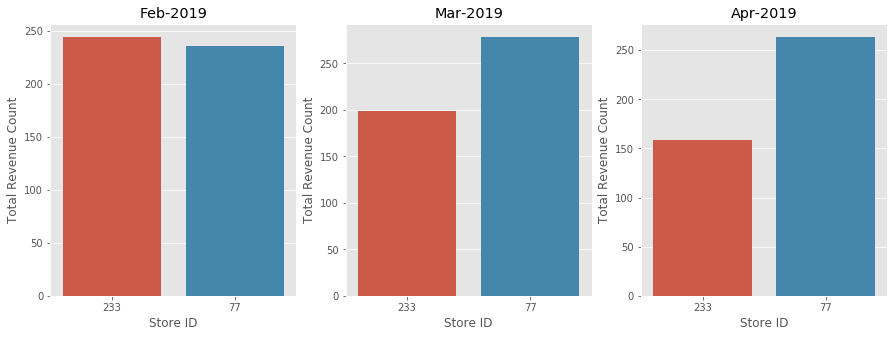

In [31]:
# <<<--- Plot the Data for Store 77 and 233 --->>>

fig1, ax1 =plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.barplot(x=['77', '233'], y=[trial_df[(trial_df['STORE_NBR']==77) & (trial_df['MONTH']=='02')]['TOT_SALES'].sum(), trial_df[(trial_df['STORE_NBR']==233) & (trial_df['MONTH']=='02')]['TOT_SALES'].sum()], ax=ax1[0])  # Barplot
ax1[0].set(xlabel="Store ID", ylabel='Total Revenue Count', title='Feb-2019')      

sns.barplot(x=['77', '233'], y=[trial_df[(trial_df['STORE_NBR']==77) & (trial_df['MONTH']=='03')]['TOT_SALES'].sum(), trial_df[(trial_df['STORE_NBR']==233) & (trial_df['MONTH']=='03')]['TOT_SALES'].sum()], ax=ax1[1])  # Barplot
ax1[1].set(xlabel="Store ID", ylabel='Total Revenue Count', title='Mar-2019')  

sns.barplot(x=['77', '233'], y=[trial_df[(trial_df['STORE_NBR']==77) & (trial_df['MONTH']=='04')]['TOT_SALES'].sum(), trial_df[(trial_df['STORE_NBR']==233) & (trial_df['MONTH']=='04')]['TOT_SALES'].sum()], ax=ax1[2])  # Barplot
ax1[2].set(xlabel="Store ID", ylabel='Total Revenue Count', title='Apr-2019')  

fig1.savefig('Task27.png')

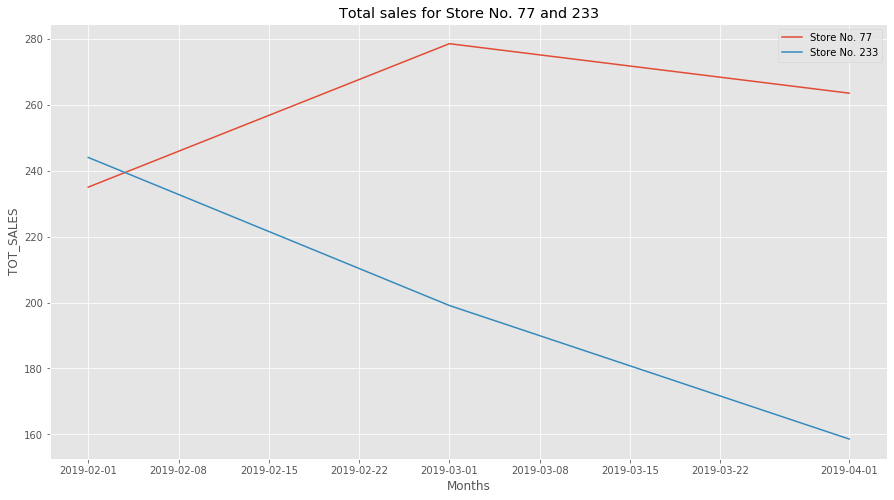

In [32]:
import datetime

plt.figure(figsize=(15,8))

t_d1 = trial_df[trial_df['STORE_NBR'] == 77].groupby(by='MONTH').sum()
t_d1['Months'] = ['2019-2', '2019-3', '2019-4']
t_d1['Months'] = [datetime.datetime.strptime(date, '%Y-%m') for date in t_d1['Months']]

t_d2 = trial_df[trial_df['STORE_NBR'] == 233].groupby(by='MONTH').sum()
t_d2['Months'] = ['2019-2', '2019-3', '2019-4']
t_d2['Months'] = [datetime.datetime.strptime(date, '%Y-%m') for date in t_d2['Months']]

sns.lineplot(x=t_d1['Months'], y=t_d1['TOT_SALES'], legend='brief')
sns.lineplot(x=t_d2['Months'], y=t_d2['TOT_SALES'], legend='brief')

plt.legend(['Store No. 77', 'Store No. 233'])
plt.title('Total sales for Store No. 77 and 233')

plt.savefig('Task28.png')

### b) Compare the Trial store 86 and Control store 155.

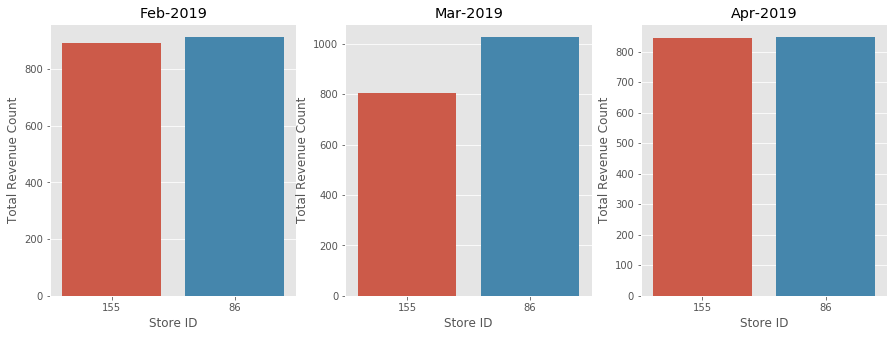

In [33]:
# <<<--- Plot the Data for Store 86 and 155 --->>>

fig1, ax1 =plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.barplot(x=['86', '155'], y=[trial_df[(trial_df['STORE_NBR']==86) & (trial_df['MONTH']=='02')]['TOT_SALES'].sum(), trial_df[(trial_df['STORE_NBR']==155) & (trial_df['MONTH']=='02')]['TOT_SALES'].sum()], ax=ax1[0])  # Barplot
ax1[0].set(xlabel="Store ID", ylabel='Total Revenue Count', title='Feb-2019')    
sns.barplot(x=['86', '155'], y=[trial_df[(trial_df['STORE_NBR']==86) & (trial_df['MONTH']=='03')]['TOT_SALES'].sum(), trial_df[(trial_df['STORE_NBR']==155) & (trial_df['MONTH']=='03')]['TOT_SALES'].sum()], ax=ax1[1])  # Barplot
ax1[1].set(xlabel="Store ID", ylabel='Total Revenue Count', title='Mar-2019')  

sns.barplot(x=['86', '155'], y=[trial_df[(trial_df['STORE_NBR']==86) & (trial_df['MONTH']=='04')]['TOT_SALES'].sum(), trial_df[(trial_df['STORE_NBR']==155) & (trial_df['MONTH']=='04')]['TOT_SALES'].sum()], ax=ax1[2])  # Barplot
ax1[2].set(xlabel="Store ID", ylabel='Total Revenue Count', title='Apr-2019')  

fig1.savefig('Task29.png')

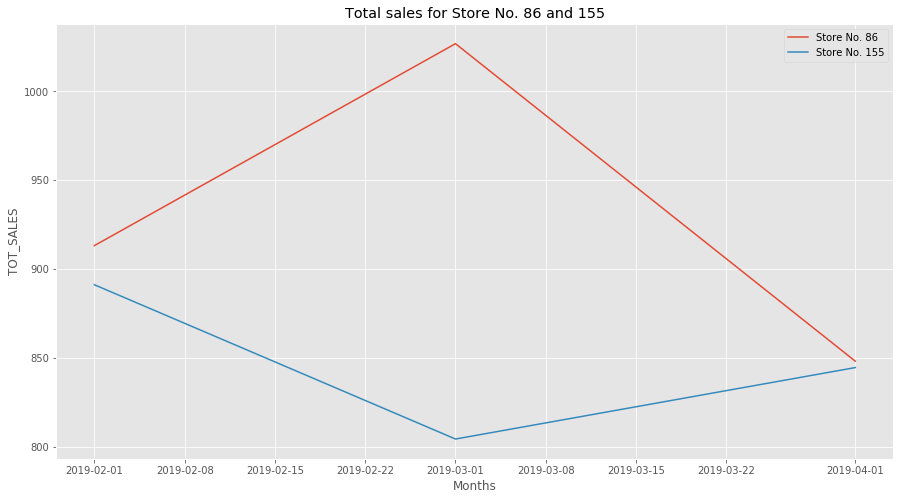

In [34]:
import datetime

plt.figure(figsize=(15,8))

t_d1 = trial_df[trial_df['STORE_NBR'] == 86].groupby(by='MONTH').sum()
t_d1['Months'] = ['2019-2', '2019-3', '2019-4']
t_d1['Months'] = [datetime.datetime.strptime(date, '%Y-%m') for date in t_d1['Months']]

t_d2 = trial_df[trial_df['STORE_NBR'] == 155].groupby(by='MONTH').sum()
t_d2['Months'] = ['2019-2', '2019-3', '2019-4']
t_d2['Months'] = [datetime.datetime.strptime(date, '%Y-%m') for date in t_d2['Months']]

sns.lineplot(x=t_d1['Months'], y=t_d1['TOT_SALES'], legend='brief')
sns.lineplot(x=t_d2['Months'], y=t_d2['TOT_SALES'], legend='brief')

plt.legend(['Store No. 86', 'Store No. 155'])
plt.title('Total sales for Store No. 86 and 155')

plt.savefig('Task30.png')

### c) Compare the Trial store 88 and Control store 237.

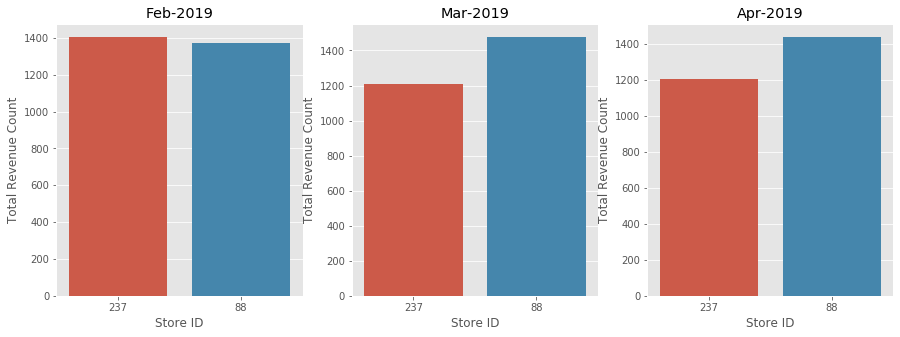

In [35]:
# <<<--- Plot the Data for Store 88 and 237 --->>>

fig1, ax1 =plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.barplot(x=['88', '237'], y=[trial_df[(trial_df['STORE_NBR']==88) & (trial_df['MONTH']=='02')]['TOT_SALES'].sum(), trial_df[(trial_df['STORE_NBR']==237) & (trial_df['MONTH']=='02')]['TOT_SALES'].sum()], ax=ax1[0])  # Barplot
ax1[0].set(xlabel="Store ID", ylabel='Total Revenue Count', title='Feb-2019')    
sns.barplot(x=['88', '237'], y=[trial_df[(trial_df['STORE_NBR']==88) & (trial_df['MONTH']=='03')]['TOT_SALES'].sum(), trial_df[(trial_df['STORE_NBR']==237) & (trial_df['MONTH']=='03')]['TOT_SALES'].sum()], ax=ax1[1])  # Barplot
ax1[1].set(xlabel="Store ID", ylabel='Total Revenue Count', title='Mar-2019')  

sns.barplot(x=['88', '237'], y=[trial_df[(trial_df['STORE_NBR']==88) & (trial_df['MONTH']=='04')]['TOT_SALES'].sum(), trial_df[(trial_df['STORE_NBR']==237) & (trial_df['MONTH']=='04')]['TOT_SALES'].sum()], ax=ax1[2])  # Barplot
ax1[2].set(xlabel="Store ID", ylabel='Total Revenue Count', title='Apr-2019')  

fig1.savefig('Task31.png')

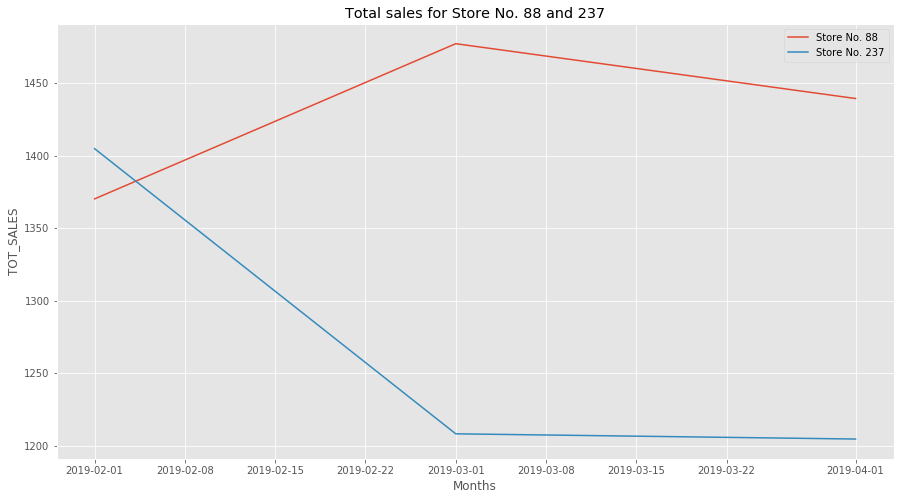

In [36]:
import datetime

plt.figure(figsize=(15,8))

t_d1 = trial_df[trial_df['STORE_NBR'] == 88].groupby(by='MONTH').sum()
t_d1['Months'] = ['2019-2', '2019-3', '2019-4']
t_d1['Months'] = [datetime.datetime.strptime(date, '%Y-%m') for date in t_d1['Months']]

t_d2 = trial_df[trial_df['STORE_NBR'] == 237].groupby(by='MONTH').sum()
t_d2['Months'] = ['2019-2', '2019-3', '2019-4']
t_d2['Months'] = [datetime.datetime.strptime(date, '%Y-%m') for date in t_d2['Months']]

sns.lineplot(x=t_d1['Months'], y=t_d1['TOT_SALES'], legend='brief')
sns.lineplot(x=t_d2['Months'], y=t_d2['TOT_SALES'], legend='brief')

plt.legend(['Store No. 88', 'Store No. 237'])
plt.title('Total sales for Store No. 88 and 237')

plt.savefig('Task32.png')

# Final Results for Part-2

### 1. Sales in Feburary-2019 for store number 77 is approx. same as  its control store 233, but there is significant increase in sales in Store Numeber 77 in month March-2019 and April-2019 where as Store 233 shows us decrease in sales. Therefore we can say that changes made in Store 77 are effective.

### 2. Sales in Feburary-2019 for store number 86 is approx. same as  its control store 155 and in next month (March-2019) sales for Store 86 increases abruptly than store 155, but in next month (April-2019) again the sales of both the stores becomes approximately equal. So we conclude that store number 86 is not showing us the significant changes and hence we say that changes made in Store 86 is not so effective like other trial stores.

### 3. Sales in Feburary-2019 for store number 88 is approx. same as  its control store 237, but there is significant increase in sales in Store Numeber 88 in month March-2019 and April-2019 where as Store 237 shows us decrease in sales. Therefore we can say that changes made in Store 88 are effective.

# Overall Summary

 ### We've found control stores 233, 155, 237 for trial stores 77, 86 and 88 respectively.

### The trial stores 77 and 88 during the trial period show a significant difference after one month from starting of trial period. But Store 86 does not show us significant change.